Рассмотреть феномен (явление) Рунге — в численном анализе эффект нежелательных осцилляций, возникающий при интерполяции полиномами высоких степеней.

Функция $$ y(x)=  \frac{1}{(1+25∙x^2)} $$ на отрезке $$ x∈[-2,2]$$

Обучающая выборка: $$ S^l={x_i=4∙\frac{(i-1)}{(l-1)}-2 | i=1,…,l} $$

Контрольная выборка: $$ S^k={x_i=4∙\frac{(i-0.5)}{(l-1)}-2 | i=1,…,l-1} $$

Рассчитать функционал эмпирического риска (функционал качества) для обучающей и контрольной выборок (вывести графики). Оценить обобщающую способность (generalization ability). Найти оптимальную степень полинома для аппроксимации.

Повторить для зашумленных данных.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def source_func(x):
    return 1 / (1 + 25*x**2)

In [ ]:
# функционал эмпирического риска (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [ ]:
# генерация обучающей выборки
l = 50
train_set = np.array([4*(i-1)/(l-1) - 2 for i in range(1, l+1)])
train_labels = source_func(train_set)

# генерация контрольной выборки
k = 50
test_set = np.array([4*(i-0.5)/(k-1) - 2 for i in range(1, k)])
test_labels = source_func(test_set)

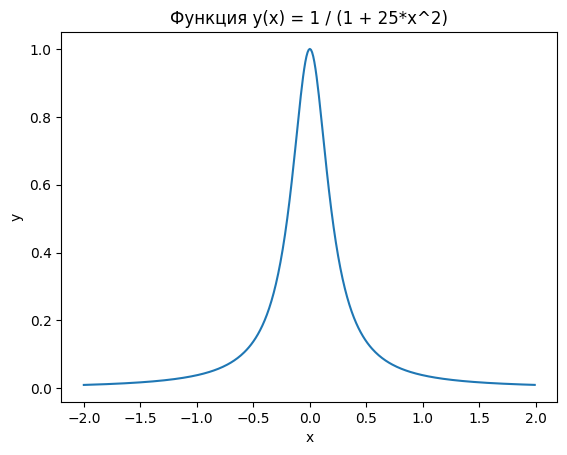

In [ ]:
# вывод графиков
x = np.arange(-2, 2, 0.01)
plt.plot(x, source_func(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функция y(x) = 1 / (1 + 25*x^2)')
plt.show()

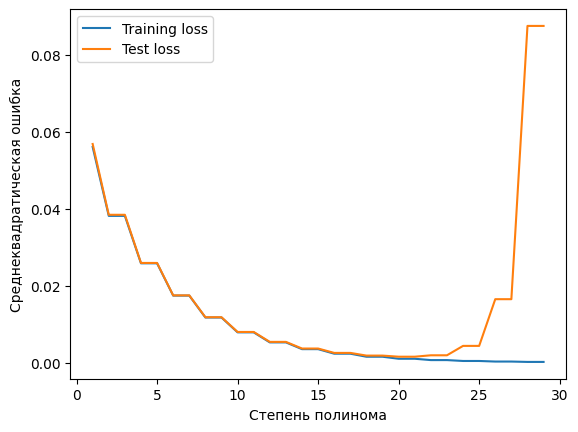

In [ ]:
# определение степени полинома и построение модели на обучающей выборке
degrees = range(1, 30)
train_loss = []
test_loss = []
for deg in degrees:
    # обучение модели
    p = np.polyfit(train_set, train_labels, deg)
    model = np.poly1d(p)

    # расчет ошибки на обучающей и контрольной выборках
    train_pred = np.polyval(model, train_set)
    test_pred = np.polyval(model, test_set)
    train_loss.append(mse(train_labels, train_pred))
    test_loss.append(mse(test_labels, test_pred))

plt.plot(degrees, train_loss, label='Training loss')
plt.plot(degrees, test_loss, label='Test loss')
plt.legend()
plt.xlabel('Степень полинома')
plt.ylabel('Среднеквадратическая ошибка')
plt.show()


In [ ]:
# нахождение индекса элемента списка test_loss с минимальным значением
min_idx = np.argmin(test_loss)
best_deg = degrees[min_idx]

# степень, при которой ошибка на контрольной выборке минимальна
print("Оптимальная степень полинома:", best_deg)

Оптимальная степень полинома: 20


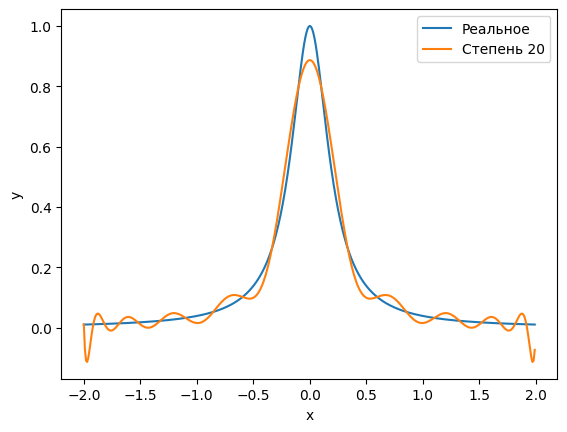

In [ ]:
# вывод графиков моделей
plt.plot(x, source_func(x), label='Реальное')

# обучение модели
p = np.polyfit(train_set, train_labels, best_deg)
model = np.poly1d(p)

# вывод графика модели
plt.plot(x, np.polyval(model, x), label='Степень {}'.format(best_deg))

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

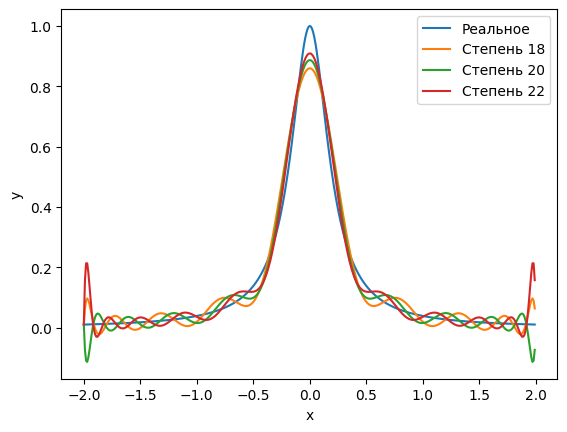

In [ ]:
# вывод графиков моделей
plt.plot(x, source_func(x), label='Реальное')
for deg in [best_deg-2, best_deg, best_deg+2]:
    # обучение модели
    p = np.polyfit(train_set, train_labels, deg)
    model = np.poly1d(p)

    # вывод графика модели
    plt.plot(x, np.polyval(model, x), label='Степень {}'.format(deg))

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

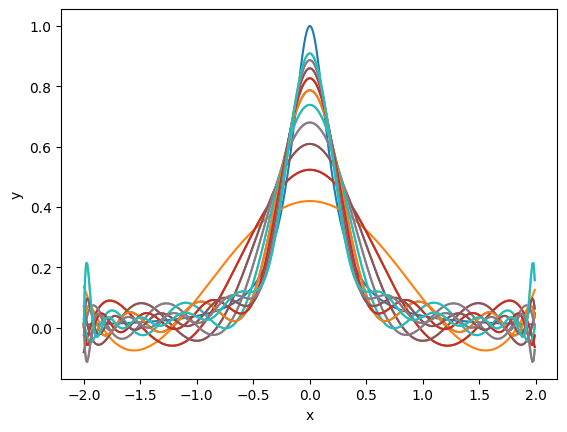

In [ ]:
# вывод графиков моделей
plt.plot(x, source_func(x), label='Реальное')
for deg in range(5,24):
    # обучение модели
    p = np.polyfit(train_set, train_labels, deg)
    model = np.poly1d(p)

    # вывод графика модели
    plt.plot(x, np.polyval(model, x), label='Степень {}'.format(deg))

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# вывод результатов
for i, deg in enumerate(degrees):
    print(f"Степень {deg}:")
    print(f"Train MSE = {train_loss[i]:.3f}")
    print(f"Test MSE = {test_loss[i]:.3f}\n")

Степень 1:
Train MSE = 0.056
Test MSE = 0.057

Степень 2:
Train MSE = 0.038
Test MSE = 0.038

Степень 3:
Train MSE = 0.038
Test MSE = 0.038

Степень 4:
Train MSE = 0.026
Test MSE = 0.026

Степень 5:
Train MSE = 0.026
Test MSE = 0.026

Степень 6:
Train MSE = 0.017
Test MSE = 0.017

Степень 7:
Train MSE = 0.017
Test MSE = 0.017

Степень 8:
Train MSE = 0.012
Test MSE = 0.012

Степень 9:
Train MSE = 0.012
Test MSE = 0.012

Степень 10:
Train MSE = 0.008
Test MSE = 0.008

Степень 11:
Train MSE = 0.008
Test MSE = 0.008

Степень 12:
Train MSE = 0.005
Test MSE = 0.005

Степень 13:
Train MSE = 0.005
Test MSE = 0.005

Степень 14:
Train MSE = 0.003
Test MSE = 0.004

Степень 15:
Train MSE = 0.003
Test MSE = 0.004

Степень 16:
Train MSE = 0.002
Test MSE = 0.003

Степень 17:
Train MSE = 0.002
Test MSE = 0.003

Степень 18:
Train MSE = 0.002
Test MSE = 0.002

Степень 19:
Train MSE = 0.002
Test MSE = 0.002

Степень 20:
Train MSE = 0.001
Test MSE = 0.002

Степень 21:
Train MSE = 0.001
Test MSE = 0.002

С

В случае регрессии модель оценивается довольно просто. Хорошо обученная модель регрессии
дает прогнозные значения, близкие к наблюдаемым.

А теперь иллюстрация феномена Рунге.

<ipython-input-14-f7385c715b03>:10: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(train_set, train_labels, deg)


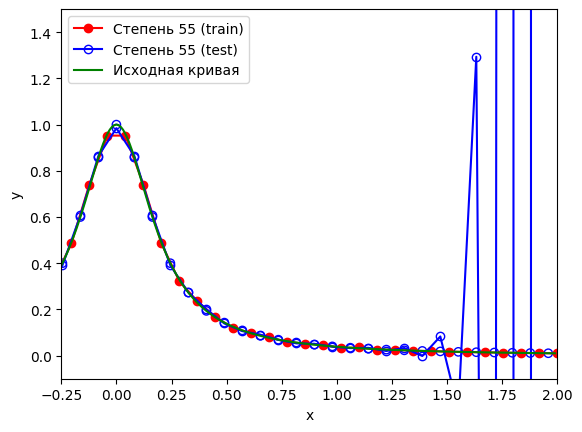

In [ ]:
l = 50
train_set = np.array([4*(i-1)/(l-1) - 2 for i in range(1, l+1)])
train_labels = source_func(train_set)

k = 50
test_set = np.array([4*(i-0.5)/(k-1) - 2 for i in range(1, k)])
test_labels = source_func(test_set)

deg = 55
p = np.polyfit(train_set, train_labels, deg)
model = np.poly1d(p)

plt.plot(train_set, np.polyval(model, train_set), color='red', label='Степень {} (train)'.format(deg), marker = 'o')
plt.scatter(test_set, test_labels, color='blue', marker = 'o', facecolors='none')
plt.plot(test_set, np.polyval(model, test_set), color='blue', label='Степень {} (test)'.format(deg), marker = 'o', markerfacecolor='none')
plt.plot(x, source_func(x), color='green', label='Исходная кривая')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.25, 2)
plt.ylim(-0.1, 1.5)
plt.legend()
plt.show()